In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datafile = 'telco-customer.csv'

data = pd.read_csv(datafile)
%matplotlib inline

Sorry for my bad english hehe

Here we will analyse and make a model for Telco Customer data then predict 'churn' of customer
1. Data Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Machine Learning
5. Hyperparameter Tuning

# 1. Data Cleaning

In [15]:
data.shape

(7043, 21)

In [16]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Look, TotalCharges has object type

In [18]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors = 'coerce')

In [19]:
data.isnull().sum()
#There are 11 NaN value, let's identify it

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
data[data.TotalCharges.isnull()]
#it's clear that Total Charges is NaN for tenure = 0, it's newbie customer then we will give NaN value as 0

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [21]:
#fill the NaN with median and check
data.TotalCharges.fillna(0,inplace=True)
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Above we know that the type of category columns such as gender, phone service, internet service, etc. are defined as
object columns instead of category columns. We should change it.

We will change Senior Citizen value as 1 or 0

In [22]:
citizen_code = {1:'Yes',0:'No'}
data['SeniorCitizen'] = data['SeniorCitizen'].map(citizen_code)

In [23]:
category_columns = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
                    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','PaymentMethod','TechSupport','StreamingTV',
                    'StreamingMovies','PaperlessBilling','Contract','Churn']
numeric_columns = ['tenure','MonthlyCharges','TotalCharges']

In [24]:
data[category_columns] = data[category_columns].apply(lambda x: x.astype('category'))

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null category
SeniorCitizen       7043 non-null category
Partner             7043 non-null category
Dependents          7043 non-null category
tenure              7043 non-null int64
PhoneService        7043 non-null category
MultipleLines       7043 non-null category
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null category
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null catego

I think customerID doesn't important for this case so it will be dropped

In [26]:
data = data.drop(columns='customerID')

# 2. Exploratory Data Analysis

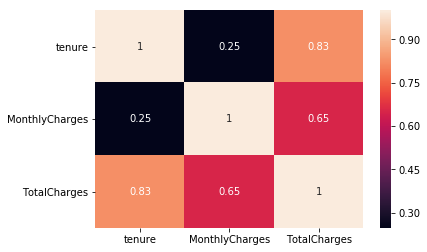

In [27]:
sns.heatmap(data.corr(),annot=True)

Tenure has relatively strong correlation with total charges

C:\Users\Ahmad Nur Aziz\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


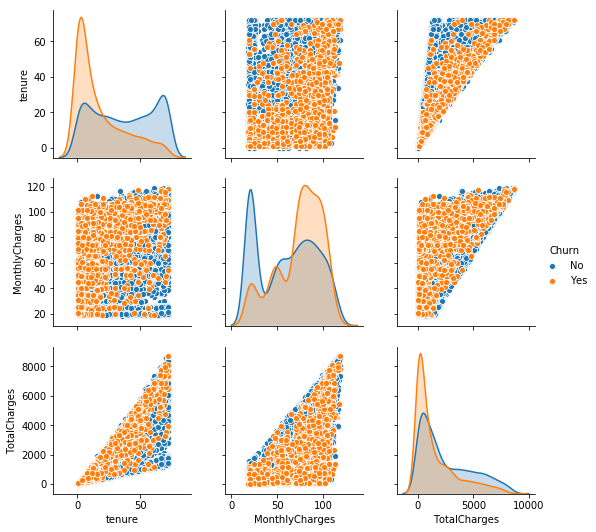

In [28]:
sns.pairplot(hue='Churn',data=data)

Long tenure has high TotalCharges. And we see from pairplot diagonal or histogram of each features tend to affect Churn values. So we will keep all numerical values

Next, I will divide category columns as demographic columns and service columns

In [29]:
demo_cols = category_columns[0:4]
serv_cols = category_columns[4:-1]
print(demo_cols)
print(serv_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents']
['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'PaymentMethod', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract']


# Let's see categorical features

In [30]:
cols = category_columns[:-1]
cols = np.array(cols).reshape(4,4)

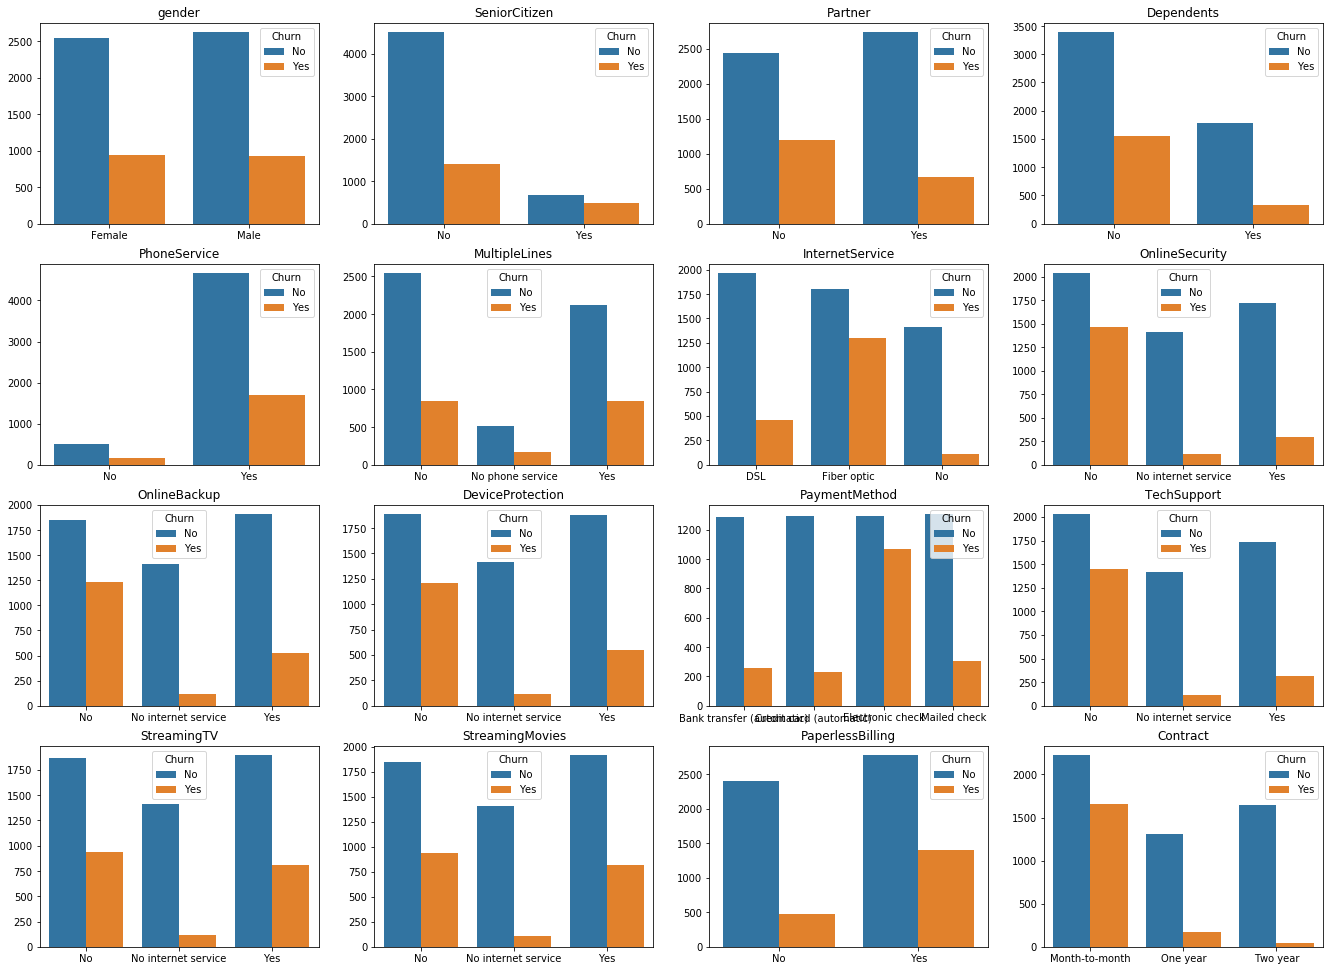

In [31]:
fig,ax = plt.subplots(4,4,figsize=(23,17))
for i in range(4):
    for j in range(4):
        sns.countplot(cols[i,j],hue='Churn',ax=ax[i,j],data=data)
        ax[i,j].set_title(cols[i,j])
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')

# 3. Feature Engineering and Selection

In [32]:
#from sklearn.feature_extraction import DictVectorizer
#vec = DictVectorizer(sparse=False, dtype='category')
#vec.fit_transform(data['PhoneService'])

In [33]:
from sklearn.preprocessing import scale
numeric_data = pd.DataFrame(scale(data[numeric_columns]), index=data.index, columns=numeric_columns)
numeric_data.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874


In [34]:
non_numeric = pd.get_dummies(data[category_columns[:-1]])
non_numeric.loc[:,'PaymentMethod_Bank transfer (automatic)':'PaymentMethod_Mailed check'].head(5)

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [35]:
del_cols = ['StreamingMovies_No internet service','MultipleLines_No phone service',
           'OnlineSecurity_No internet service','InternetService_No','OnlineSecurity_No internet service',
           'OnlineBackup_No internet service','DeviceProtection_No internet service',
            'PaymentMethod_Bank transfer (automatic)','TechSupport_No internet service',
            'StreamingTV_No internet service'
           ]
non_numeric = non_numeric.drop(del_cols,axis =1)

In [36]:
data[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [37]:
data2 = pd.concat([numeric_data,non_numeric],axis=1)
#data2['Churn'] = data['Churn'].map({'Yes':1,'No':0})
data2['Churn'] = data['Churn']
data2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
0,-1.277445,-1.160323,-0.992611,1,0,1,0,0,1,1,...,1,0,1,0,0,1,1,0,0,No
1,0.066327,-0.259629,-0.172165,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,No
2,-1.236724,-0.362660,-0.958066,0,1,1,0,1,0,1,...,1,0,1,0,0,1,1,0,0,Yes
3,0.514251,-0.746535,-0.193672,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,No
4,-1.236724,0.197365,-0.938874,1,0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,0,Yes


In [38]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

c:\users\ahmad nur aziz\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
data2 = data2.drop('TotalCharges',axis=1)

In [40]:
X = data2.iloc[:,:-1]
y = data2['Churn']

In [41]:
train_X,test_X, train_Y, test_Y=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [42]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7974443918599148


In [43]:
from sklearn.model_selection import GridSearchCV
#param_grid = {''}

In [44]:
model=svm.SVC()
#model.fit(train_X,train_Y)
#prediction2=model.predict(test_X)
#print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

In [45]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.7893989588263133


In [46]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.7681022243256034


In [47]:
from sklearn.metrics import classification_report
eval_metrics = classification_report(test_Y, prediction3)
print(eval_metrics)

             precision    recall  f1-score   support

         No       0.84      0.89      0.87      1552
        Yes       0.64      0.54      0.59       561

avg / total       0.79      0.80      0.79      2113



In [48]:
metr = confusion_matrix(test_Y,prediction3)
print(metr)

[[1382  170]
 [ 258  303]]
